# Classifying MNIST with Neural Networks

In this assignment we are going to create a simple two-layer neural network to try to classify the MNIST dataset, often seen as the "Hello World!" of machine learning. By the end of this, you should have a neural network that can achieve around 95% test accuracy on the dataset.

First, let's import and format the data.

In [1]:
%matplotlib inline

import math
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as npr
import scipy.io as sio

plt.gray()

train_file = sio.loadmat("train.mat")
test_file = sio.loadmat("test.mat")

# Transpose images
X = train_file['train_images']
Xtest = test_file['test_images']

X = train_file['train_images'].T.reshape(60000,784)
Y = train_file['train_labels']
Xtest = test_file['test_images'].T.reshape(784, 10000).T

Let's see what kind of data we'll be classifying. Evaluate the following cell several times to take a look at a few of the training examples.

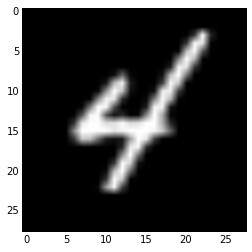

In [4]:
plt.imshow(X[npr.randint(0, Y.shape[0])].reshape(28, 28).T)

Now we need to split our data into training and validation sets. Remember that the two sets should be sampled randomly to prevent biased data.

In [3]:
# Shuffle and pick Xvalidate
A = npr.permutation(X.shape[0])
X = X[A]
Y = Y[A]

Xtrain = X[0:50000]
Ytrain = Y[0:50000]
Xvalidate = X[50000:]
Yvalidate = Y[50000:]

The following code is used for preprocessing the data and making it easier to deal with, making making the data be normalized with a mean of 0 and standard deviation of 1, and using one-hot encoding to turn the labels into vectors with binary elements.

In [5]:
# Preprocess data
def normalizeColumns(X):
    newX = X.astype(float)
    for i in range(X.shape[1]):
        mean = np.mean(X[:,i])
        std = np.std(X[:,i])
        newX[:, i] = np.dot(1 / (std + .0001), X[:, i] - np.dot(mean, np.ones(X.shape[0])))
    return newX
def log(X):
    f = np.vectorize(lambda x: math.log(x + 0.1))
    return f(X)
def extendByOne(X):
    return np.vstack((X, np.ones((1,X.shape[1]))))
def binarize(X):
    f = np.vectorize(lambda x: 1 if x > 0 else 0)
    return f(X)
def oneHotEncoding(y):
    Y = np.zeros((y.shape[0], 10))
    for i in range(Y.shape[0]):
        Y[i, y[i]] += 1
    return Y

X = normalizeColumns(X)
Xtrain = normalizeColumns(Xtrain)
Xvalidate = normalizeColumns(Xvalidate)
Xtest = normalizeColumns(Xtest)

Y = oneHotEncoding(Y)
Ytrain = oneHotEncoding(Ytrain)
Yvalidate = oneHotEncoding(Yvalidate)

## Neural Network Class

Here you will begin to implement the neural networks. This is where the bulk of the work for the assignment will be done. Let's first start off with computing the sigmoid activation function. We will be using helper functions for vectorization to better optimize the computations, but knowing the details is not necessary for this assignment.

In [6]:
def sigmoid(x):
    def helper(xj):
        ##############################
        # STUDENT SOLUTION GOES HERE #
        ##############################
        
        
        s =
        
        ##############################
        # answer: 1.0 / (1.0 + math.exp(-x))
        return s
    g = np.vectorize(helper)
    return g(x)

Next, let's write the function to calculate the loss function. For this assignment, we'll be using cross entropy loss.

In [ ]:
def crossEntropyLoss(y, z):
    def helper(yj, zj):
        ##############################
        # STUDENT SOLUTION GOES HERE #
        ##############################
        
        
        loss =
        
        ##############################
        # answer: return yj * math.log(zj + .001) + (1 - yj) * math.log(1 - zj + .001)
        return loss
    g = np.vectorize(helper)
    return - np.sum(g(y, z))

Okay, now we're getting to the meat of the algorithm, where the actual neural network is being built.
### TODO: FIGURE OUT HOW TO MAKE A PROBLEM FROM FEEDFORWARD AND BACKPROP

In [7]:
class NeuralNetwork:
    def __init__(self):
        self.V = None
        self.W = None
    
    def calculateCELoss(self, X, Y):
        if self.V == None or self.W == None:
            print("Train the Data!")
            return
        V = self.V
        W = self.W
        
        # Feedforward
        z2 = V.dot(extendByOne(np.transpose(X)))
        a2 = extendByOne(sigmoid(z2))
        z3 = W.dot(a2)
        Z = sigmoid(z3)
        
        return crossEntropyLoss(Y.T, Z)
        # Find Loss
        #def helper(yj, zj):
        #    return yj * math.log(zj + .001) + (1 - yj) * math.log(1 - zj + .001)
        #g = np.vectorize(helper)
        #return - np.sum(g(Y.T, Z))

    def trainNNCrossEntropy(self, X, Y, num_epochs=5, num_hlayers=200, print_loss=False, step_size=.01):
        # Initialize edge weights
        np.random.seed(0)
        V = np.random.normal(0, 0.1, (num_hlayers, X.shape[1] + 1))
        W = np.random.normal(0, 0.1, (Y.shape[1], num_hlayers + 1))
        
        for i in range(int(num_epochs * X.shape[0])):
            x = extendByOne(X[i % X.shape[0]].reshape(X.shape[1], 1))
            y = Y[i % Y.shape[0]].reshape(Y.shape[1], 1)
            
            # Feedforward
            z2 = V.dot(x)
            a2 = extendByOne(sigmoid(z2))
            z3 = W.dot(a2)
            yHat = sigmoid(z3)

            # Print Loss
            if print_loss and i % (X.shape[0] * num_epochs / 100) == 0:
                print("Loss at iteration {0} is {1}.".format(i, self.calculateCELoss(X, Y)))
            
            # Backpropagation
            delta3 = -(y - yHat)
            dW = delta3.dot(a2.T)
            delta2 = W.T.dot(delta3) * (1 - np.square(a2))
            dV = delta2[0:num_hlayers].dot(x.T)
            
            
            W = W - step_size * dW
            V = V - step_size * dV
                
            self.W = W
            self.V = V
        
    def predictNN(self, X):
        if self.V == None or self.W == None:
            print("Train the Data!")
            return
        V = self.V
        W = self.W
        
        # Feedforward
        H = sigmoid(V.dot(extendByOne(np.transpose(X))))
        Z = sigmoid(W.dot(extendByOne(H)))
        
        # Make predictions
        arg = np.argmax(Z, axis=0)
        Y = np.zeros((Z.shape[1],Z.shape[0]))
        for i in range(arg.shape[0]):
            Y[i, arg[i]] += 1
        return Y

## Training and Validation Errors

### Cross Entropy Error

In [8]:
def benchmark(Y_pred, Y_true):
    y_pred = np.argmax(Y_pred, axis=1)
    y_true = np.argmax(Y_true, axis=1)
    return np.mean(y_pred != y_true)

In [9]:
# Validation on MNIST
classifier = NeuralNetwork()
classifier.trainNNCrossEntropy(Xtrain, Ytrain, print_loss=True, step_size=.01)

Train the Data!
Loss at iteration 0 is None.
Loss at iteration 50000 is 17947.01800950623.
Loss at iteration 100000 is 11849.3576774966.
Loss at iteration 150000 is 8779.547419452043.
Loss at iteration 200000 is 6971.827386020055.
Loss at iteration 250000 is 4977.713981728528.
Loss at iteration 300000 is 3928.8458706345905.
Loss at iteration 350000 is 3256.605111456928.
Loss at iteration 400000 is 2485.531222178772.
Loss at iteration 450000 is 1915.3674590203495.


/Users/derasagis/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:7: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


In [12]:
# Training error on MNIST
Y_pred = classifier.predictNN(Xtrain)
error_rate = benchmark(Y_pred, Ytrain)
print("Training Error for Cross Entropy: " + str(error_rate))

Training Error for Cross Entropy: 0.00284


/Users/derasagis/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:61: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


In [13]:
# Validation error on MNIST
Y_pred = classifier.predictNN(Xvalidate)
error_rate = benchmark(Y_pred, Yvalidate)
print("Validation Error for Cross Entropy: " + str(error_rate))

Validation Error for Cross Entropy: 0.0487


/Users/derasagis/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:61: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


## Runtime and Plots

In [15]:
# Cross Entropy Time
import time
start = time.time()
classifier = NeuralNetwork()
classifier.trainNNCrossEntropy(Xtrain, Ytrain, num_epochs=1, print_loss=False, step_size=.01)
end = time.time()
print("Time elapsed: {0}".format(end - start))

Time elapsed: 60.09073781967163


In [16]:
# Plot Cross Entropy Error
classifier = NeuralNetwork()
iterations = [1000 * i for i in range(10)]
error_rates = []
for n in [.02 * (n + 1) for n in range(10)]:
    classifier.trainNNCrossEntropy(Xtrain, Ytrain, num_epochs=n, print_loss=False, step_size=.01)
    y_pred = classifier.predictNN(Xtrain)
    error_rates.append(benchmark(y_pred, Ytrain))

/Users/derasagis/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:61: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


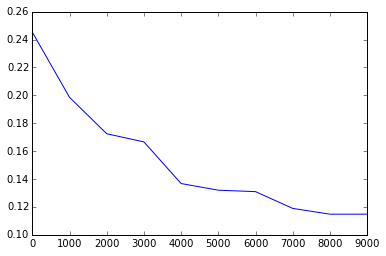

In [17]:
plt.plot(iterations, error_rates)